In this project, I will focus on conducting a detailed analysis of a large corpus of financial news data to uncover correlations between news sentiment and stock market movements. This challenge is an opportunity for me to refine my skills in Data Engineering (DE), Financial Analytics (FA), and Machine Learning Engineering (MLE).

Through this experience, I aim to enhance my ability to analyze complex datasets, demonstrate adaptability, and apply innovative thinking—key skills needed to excel in the demanding environment at Nova Financial Insights. This project will also deepen my understanding of essential financial analytic techniques.



Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publish

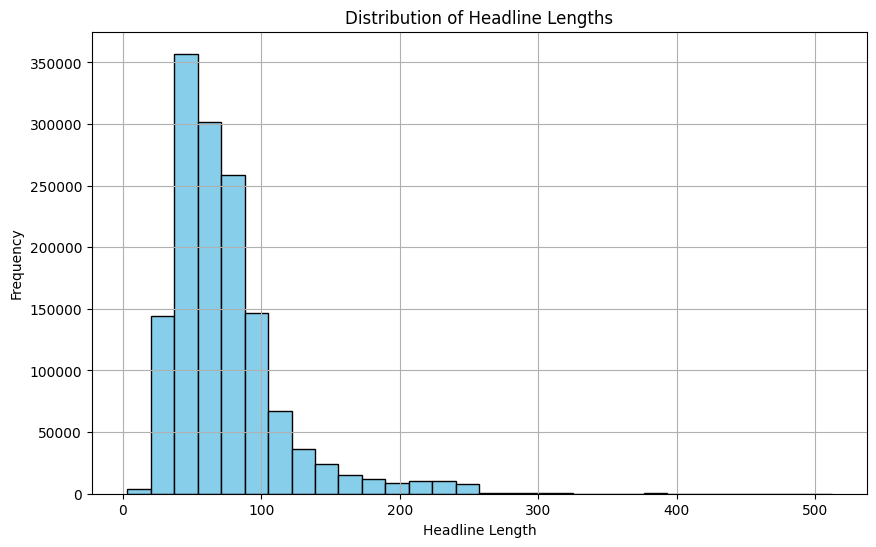


Number of Articles per Publisher:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
                      ...  
MoneyGeek                 1
muathe                    1
Robert Morris             1
LeftCoastHedgie           1
Jeremie Capron            1
Name: count, Length: 1034, dtype: int64


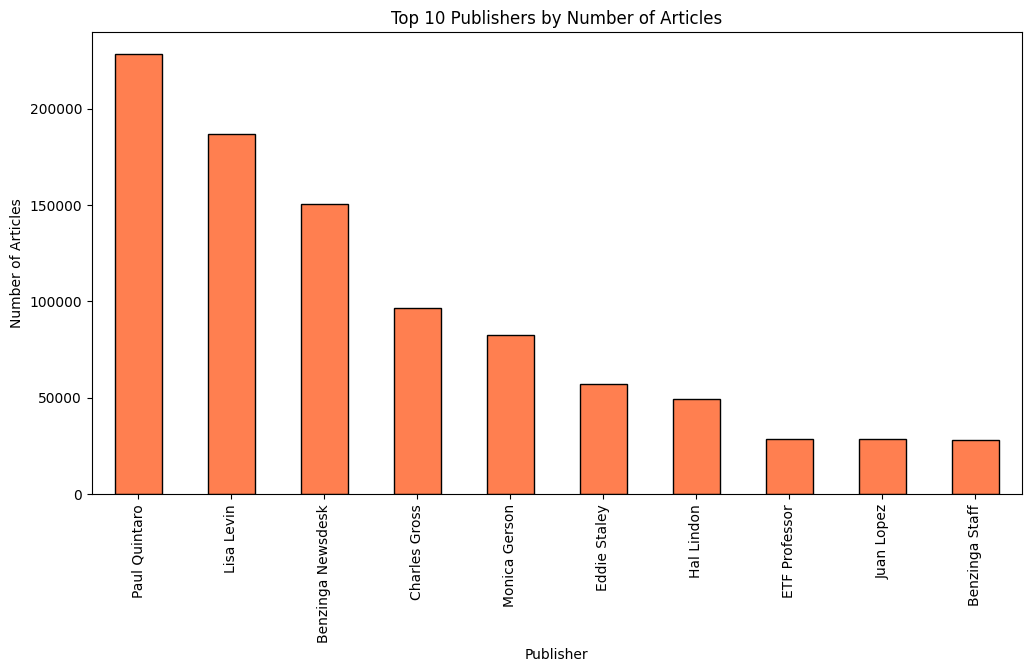


Number of Articles by Day of the Week:
day_of_week
Thursday     289907
Wednesday    289049
Tuesday      285468
Monday       254842
Friday       208511
Sunday        16078
Saturday       7486
Name: count, dtype: int64


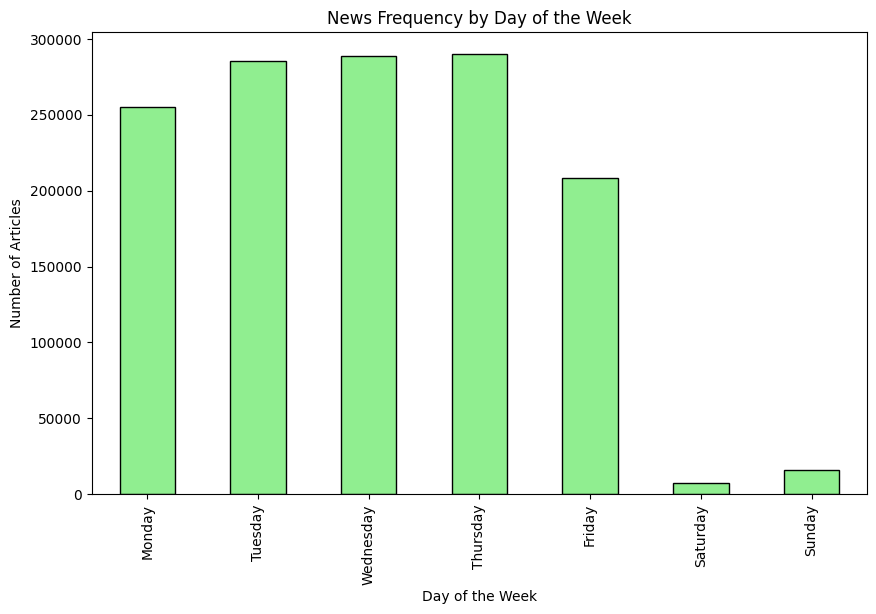


Monthly Article Trends:
month
2009-02        1
2009-04        3
2009-05       12
2009-06       40
2009-07       75
           ...  
2020-02    16523
2020-03    20314
2020-04    16141
2020-05     8659
2020-06      457
Freq: M, Name: count, Length: 136, dtype: int64


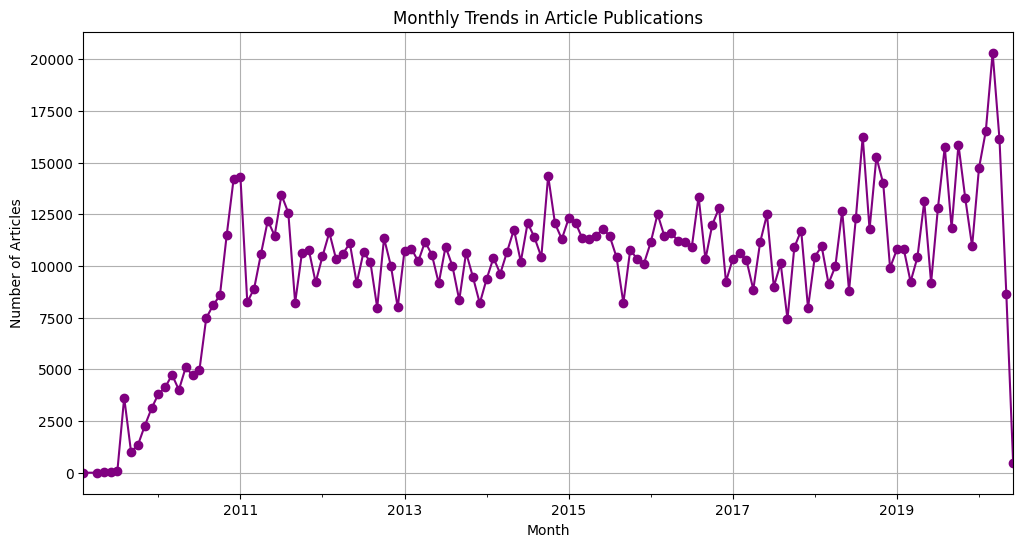


Number of Articles Published Between 2023-01-01 and 2023-01-31: 0


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Load the dataset (replace 'file_path.csv' with your actual file path)
file_path = '../data/raw_analyst_ratings.csv'
data = pd.read_csv(file_path)

# Display basic info and preview of the dataset
print("Dataset Overview:")
print(data.info())
print(data.head())

# 1. Basic Statistics for Headline Lengths
# Calculate headline lengths
data['headline_length'] = data['headline'].str.len()

# Obtain basic statistics for headline lengths
print("\nBasic Statistics for Headline Lengths:")
print(data['headline_length'].describe())

# Plot the distribution of headline lengths
plt.figure(figsize=(10, 6))
data['headline_length'].hist(bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Headline Lengths')
plt.xlabel('Headline Length')
plt.ylabel('Frequency')
plt.show()

# 2. Count Articles per Publisher
publisher_counts = data['publisher'].value_counts()

print("\nNumber of Articles per Publisher:")
print(publisher_counts)

# Visualize the top publishers
plt.figure(figsize=(12, 6))
publisher_counts.head(10).plot(kind='bar', color='coral', edgecolor='black')
plt.title('Top 10 Publishers by Number of Articles')
plt.xlabel('Publisher')
plt.ylabel('Number of Articles')
plt.show()

# 3. Analyze Publication Dates
# Convert the 'date' column to datetime format
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Extract relevant date information
data['day_of_week'] = data['date'].dt.day_name()
data['month'] = data['date'].dt.to_period('M')

# Analyze news frequency by day of the week
day_counts = data['day_of_week'].value_counts()
print("\nNumber of Articles by Day of the Week:")
print(day_counts)

plt.figure(figsize=(10, 6))
day_counts.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('News Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Articles')
plt.show()

# Analyze trends over time (monthly frequency)
monthly_counts = data['month'].value_counts().sort_index()
print("\nMonthly Article Trends:")
print(monthly_counts)

plt.figure(figsize=(12, 6))
monthly_counts.plot(kind='line', marker='o', color='purple')
plt.title('Monthly Trends in Article Publications')
plt.xlabel('Month')
plt.ylabel('Number of Articles')
plt.grid()
plt.show()

# Optional: Analyze trends during specific events (custom date filtering)
# Example: Filter articles published during a specific month or event period
start_date = '2023-01-01'
end_date = '2023-01-31'
filtered_data = data[(data['date'] >= start_date) & (data['date'] <= end_date)]
print(f"\nNumber of Articles Published Between {start_date} and {end_date}: {len(filtered_data)}")


In [23]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
# 4. Sentiment Analysis on Headlines
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['headline'].apply(get_sentiment)

print("\nSentiment Analysis Results:")
print(data['sentiment'].value_counts())

# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
data['sentiment'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Sentiment Distribution of Headlines')
plt.xlabel('Sentiment')
plt.ylabel('Number of Articles')
plt.show()

# 5. Topic Modeling and Common Keywords Extraction
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X = vectorizer.fit_transform(data['headline'].dropna())
keywords = vectorizer.get_feature_names_out()

print("\nTop Keywords in Headlines:")
print(keywords)

# Generate a word cloud for visualization
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(keywords))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Top Keywords')
plt.show()


ModuleNotFoundError: No module named 'textblob'